In [151]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

users_df = pd.read_json("users.json")
tracks_df = pd.read_json("tracks.json")
artists_df = pd.read_json("artists.json")
session_df = pd.read_json("sessions.json")



# New Section

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           954 non-null    int64 
 1   name              954 non-null    object
 2   city              954 non-null    object
 3   street            954 non-null    object
 4   favourite_genres  954 non-null    object
 5   premium_user      954 non-null    bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 38.3+ KB


In [6]:

print("Number of uniqe values: ", users_df.loc[:,'user_id'].nunique(), "\nNumber of values: ", users_df.loc[:,'user_id'].size)

Number of uniqe values:  954 
Number of values:  954


In [7]:
users_df = users_df.astype({
    'name': str,
    'city': str,
    'street': str,    
})

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           954 non-null    int64 
 1   name              954 non-null    object
 2   city              954 non-null    object
 3   street            954 non-null    object
 4   favourite_genres  954 non-null    object
 5   premium_user      954 non-null    bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 38.3+ KB


In [8]:
users_df.describe()

user_id
count   954.000000
mean    577.500000
std     275.540378
min     101.000000
25%     339.250000
50%     577.500000
75%     815.750000
max    1054.000000

In [9]:
users_df.head(20)

user_id                  name      city                      street  \
0       101          Maurycy Lejk   Wrocław  al. Powstańców Śląskich 04   
1       102          Julian Rohde    Kraków              al. Rataja 793   
2       103          Jerzy Żelazo    Kraków           pl. Orzechowa 509   
3       104           Ada Mazanek  Warszawa           pl. Zacisze 78/30   
4       105        Ernest Kukieła  Warszawa                 al. Orla 40   
5       106         Maciej Kopyto    Gdynia              pl. Plażowa 74   
6       107         Ewa Niklewicz  Warszawa       al. Kilińskiego 01/73   
7       108         Bianka Piszcz    Poznań             pl. Owocowa 141   
8       109         Elżbieta Ciak  Szczecin             aleja Borowa 84   
9       110       Mikołaj Kawulok    Poznań         ul. Działkowa 93/34   
10      111          Kaja Wojtach    Gdynia          ulica Topolowa 160   
11      112          Patryk Goska     Radom       aleja Konarskiego 263   
12      113          Sylwia Tylec    Kraków            ul. Staszica 256   
13      114  Krzysztof Wieczerzak    Gdynia           ul. Irysowa 46/45   
14      115           Ewa Frelich  Szczecin      ulica Konwaliowa 69/69   
15      116          Bartek Tofil  Szczecin           plac Odrzańska 19   
16      117      Krzysztof Dyczko    Kraków             pl. Norwida 984   
17      118          Witold Krasa    Kraków      pl. Krasińskiego 69/88   
18      119        Marcel Tarasek    Gdynia              pl. Sadowa 567   
19      120      Urszula Podleśna   Wrocław           pl. Warszawska 71   

                                favourite_genres  premium_user  
0          [folk, brill building pop, dance pop]          True  
1   [classic rock, dance pop, singer-songwriter]         False  
2      [pop rock, roots rock, italian adult pop]         False  
3      [italian adult pop, tropical, vocal jazz]         False  
4    [country rock, new wave, alternative metal]         False  
5        [permanent wave, pop, alternative rock]         False  
6          [lounge, album rock, adult standards]          True  
7           [argentine rock, j-pop, modern rock]         False  
8              [regional mexican, motown, j-pop]         False  
9         [regional mexican, mandopop, art rock]         False  
10            [latin pop, funk, rock en espanol]          True  
11    [blues rock, alternative rock, latin rock]         False  
12    [singer-songwriter, blues rock, hard rock]         False  
13             [adult standards, ranchera, folk]          True  
14          [europop, alternative metal, motown]         False  
15                      [hard rock, metal, soul]          True  
16          [art rock, argentine rock, art rock]          True  
17           [c-pop, psychedelic rock, ranchera]         False  
18   [j-pop, alternative rock, alternative rock]         False  
19                  [album rock, hoerspiel, mpb]         False

<Axes: xlabel='premium_user', ylabel='count'>

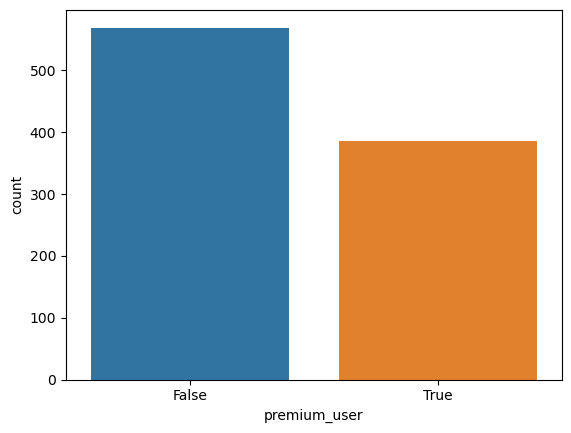

In [10]:
users_df.premium_user.fillna('Null', inplace=True)
sns.countplot(data=users_df, x='premium_user')

In [11]:
# users_df.id.fillna('Null', inplace=True)
# sns.countplot(data=users_df, x='id')

<BarContainer object of 50 artists>

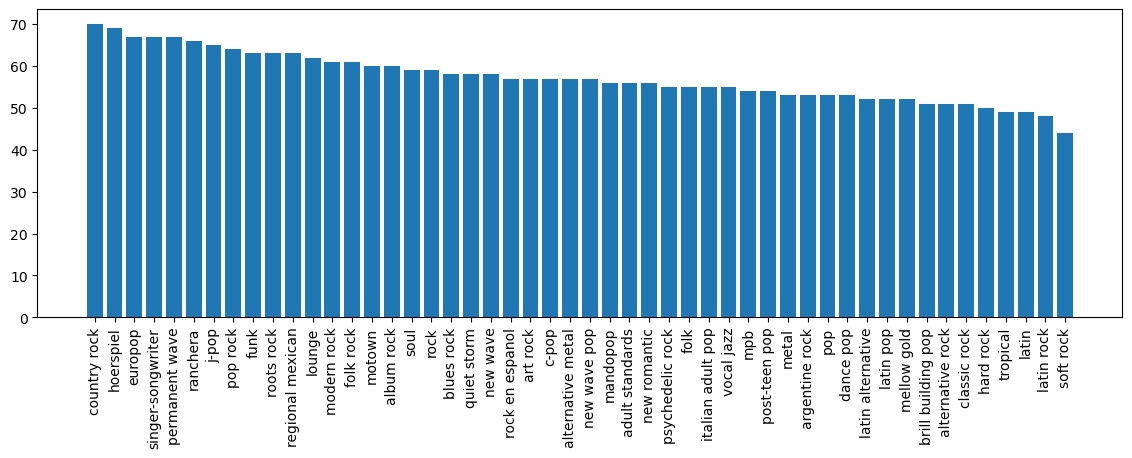

In [12]:
def to_1D(series):
  return pd.Series([x for _list in series for x in _list])

users_df.favourite_genres.fillna('', inplace=True)
unique_values = to_1D(users_df["favourite_genres"]).value_counts().index.tolist()
unique_value_counts = to_1D(users_df["favourite_genres"]).value_counts().values

fig, ax = plt.subplots(figsize = (14,4))
plt.xticks(rotation=90)
ax.bar(unique_values, unique_value_counts)

In [97]:
session_df = pd.read_json("sessions.json")
session_df.head(20)

timestamp  user_id                track_id     event_type  \
0  2022-04-08 13:51:17.000      101  4iQeCUQXp6oxdYYkERY0LN           PLAY   
1  2022-04-08 13:55:45.440      101  2A3sgyp07d7ksgjyBHYSUt           PLAY   
2  2022-04-08 13:58:20.293      101  2A3sgyp07d7ksgjyBHYSUt           LIKE   
3  2022-04-08 13:58:36.413      101                          ADVERTISEMENT   
4  2022-04-08 13:58:41.413      101  1hqrYSqvNc9x3BETX1cZhk           PLAY   
5  2022-04-08 13:59:57.497      101  1hqrYSqvNc9x3BETX1cZhk           SKIP   
6  2022-04-08 13:59:57.497      101  2IQnlYDxjgBnMwj8MaNN9E           PLAY   
7  2022-04-08 14:02:40.804      101  077bzGp5Lub2Yofj0u76Le           PLAY   
8  2022-04-08 14:04:59.463      101  077bzGp5Lub2Yofj0u76Le           SKIP   
9  2022-04-08 14:04:59.463      101                          ADVERTISEMENT   
10 2022-04-08 14:05:29.463      101  7wC4EW11mBVxDK3xdC7FTf           PLAY   
11 2022-04-08 14:07:59.490      101  2Ud3deeqLAG988pfW0Kwcl           PLAY   
12 2022-04-08 14:10:23.678      101  2Ud3deeqLAG988pfW0Kwcl           SKIP   
13 2022-04-08 14:10:23.678      101  3p5YyzoacjynG9k67ONSXV           PLAY   
14 2022-04-08 14:11:36.060      101  3p5YyzoacjynG9k67ONSXV           LIKE   
15 2022-04-08 14:13:55.705      101  3p5YyzoacjynG9k67ONSXV           SKIP   
16 2022-04-08 14:13:55.705      101  27gWlWj3amlC6EaUWxkMcZ           PLAY   
17 2022-04-08 14:15:43.817      101  27gWlWj3amlC6EaUWxkMcZ           SKIP   
18 2022-04-08 14:15:43.817      101  2YplrdHMBoRdnHgMeHEwHm           PLAY   
19 2022-04-08 14:18:49.070      101  1nxgnG63hvc87iBLEvCuHS           PLAY   

    session_id  
0          124  
1          124  
2          124  
3          124  
4          124  
5          124  
6          124  
7          124  
8          124  
9          124  
10         124  
11         124  
12         124  
13         124  
14         124  
15         124  
16         124  
17         124  
18         124  
19         124

In [14]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484214 entries, 0 to 484213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   timestamp   484214 non-null  datetime64[ns]
 1   user_id     484214 non-null  int64         
 2   track_id    484214 non-null  object        
 3   event_type  484214 non-null  object        
 4   session_id  484214 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 18.5+ MB


In [15]:
session_df.describe()

user_id     session_id
count  484214.000000  484214.000000
mean      580.109615    6510.047648
std       273.108014    3703.914882
min       101.000000     124.000000
25%       346.000000    3278.000000
50%       582.000000    6535.000000
75%       818.000000    9726.000000
max      1054.000000   12909.000000

In [16]:
session_df.loc[:, 'event_type'].unique()

array(['PLAY', 'LIKE', 'ADVERTISEMENT', 'SKIP', 'BUY_PREMIUM'],
      dtype=object)

In [17]:
session_df.loc[:, 'timestamp'] = pd.to_datetime(session_df.loc[:, 'timestamp'])
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484214 entries, 0 to 484213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   timestamp   484214 non-null  datetime64[ns]
 1   user_id     484214 non-null  int64         
 2   track_id    484214 non-null  object        
 3   event_type  484214 non-null  object        
 4   session_id  484214 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 18.5+ MB


/tmp/ipykernel_8623/333355889.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  session_df.loc[:, 'timestamp'] = pd.to_datetime(session_df.loc[:, 'timestamp'])


In [18]:
session_df.sort_values('timestamp', ascending=True, inplace=True)
session_df.groupby('session_id')

In [19]:
# differences = list()
# for session_id, session in session_df.groupby('session_id'):
#     sessions_starting_points = session.loc[session.loc[:,'event_type'] == 'PLAY'].reset_index()
#     for i in range(1, sessions_starting_points):
#         try:
#             differences.append(sessions_starting_points.loc[i, 'timestamp'] - sessions_starting_points.loc[i-1, 'timestamp'])
#             session_df['Time_diff'] = pd.to_timedelta(session_df['timestamp'].astype(str)).diff(-1)
            
#             print(sessions_starting_points.loc[i, 'timestamp'])
#         except Exception as e:
#             print(i)


In [106]:
differences = list()

zero_duration_sessions = 0
for session_id, session in session_df.groupby('session_id'):
    sessions_starting_points = session.loc[session.loc[:,'event_type'] == 'PLAY'].reset_index()
    sessions_starting_points['prev_timestamp'] = sessions_starting_points['timestamp'].shift(1)
    
    # Calculate the time difference between consecutive records
    sessions_starting_points['time_diff'] = sessions_starting_points['timestamp'] - sessions_starting_points['prev_timestamp']
    zero_duration_sessions += np.sum(sessions_starting_points['time_diff']==np.timedelta64(0))
    
zero_duration_sessions   

0

In [21]:
len(session_df)

484214

In [22]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484214 entries, 421777 to 176167
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       484214 non-null  datetime64[ns]
 1   user_id         484214 non-null  int64         
 2   track_id        484214 non-null  object        
 3   event_type      484214 non-null  object        
 4   session_id      484214 non-null  int64         
 5   prev_timestamp  484213 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 25.9+ MB


In [23]:
len([x for x in session_df.loc[:, 'user_id'].unique() if x in users_df.loc[:, 'user_id'].unique()])

954

In [24]:
len(users_df.loc[:, 'user_id'].unique())

954

In [25]:
session_df.loc[session_df.loc[:,'event_type'] == 'BUY_PREMIUM'].size

2310

In [26]:
session_df.set_index('timestamp')

user_id                track_id     event_type  \
timestamp                                                                 
2022-03-31 07:53:58.000      930  1daDRI9ahBonbWD8YcxOIB           PLAY   
2022-03-31 07:57:14.453      930  0y60itmpH0aPKsFiGxmtnh           PLAY   
2022-03-31 08:00:30.973      930  4RvWPyQ5RL0ao9LPZeSouE           PLAY   
2022-03-31 08:04:18.286      930  472vIK1ldetTxRxG3ovaiY           PLAY   
2022-03-31 08:04:18.286      930  4RvWPyQ5RL0ao9LPZeSouE           SKIP   
...                          ...                     ...            ...   
2023-03-31 13:31:10.290      459                          ADVERTISEMENT   
2023-03-31 13:31:26.290      459  5SAXn4DBU86CLSmxhpIYAH           PLAY   
2023-03-31 13:35:21.623      459  2Ao7J9Y2kmNTAoalukpxze           PLAY   
2023-03-31 13:38:57.730      459  1KsqmfawBF1j5MceAJ9Irw           PLAY   
2023-03-31 13:41:58.690      459                          ADVERTISEMENT   

                         session_id          prev_timestamp  
timestamp                                                    
2022-03-31 07:53:58.000       11268                     NaT  
2022-03-31 07:57:14.453       11268 2022-03-31 07:53:58.000  
2022-03-31 08:00:30.973       11268 2022-03-31 07:57:14.453  
2022-03-31 08:04:18.286       11268 2022-03-31 08:00:30.973  
2022-03-31 08:04:18.286       11268 2022-03-31 08:04:18.286  
...                             ...                     ...  
2023-03-31 13:31:10.290        4775 2023-03-31 13:28:17.290  
2023-03-31 13:31:26.290        4775 2023-03-31 13:31:10.290  
2023-03-31 13:35:21.623        4775 2023-03-31 13:31:26.290  
2023-03-31 13:38:57.730        4775 2023-03-31 13:35:21.623  
2023-03-31 13:41:58.690        4775 2023-03-31 13:38:57.730  

[484214 rows x 5 columns]

In [27]:
bought_premium_df = session_df[['timestamp']].copy()
bought_premium_df['bought'] = session_df['event_type'] == 'BUY_PREMIUM'
bought_premium_df['not_bought'] = session_df['event_type'] != 'BUY_PREMIUM'

bought_premium_df.head()

timestamp  bought  not_bought
421777 2022-03-31 07:53:58.000   False        True
421778 2022-03-31 07:57:14.453   False        True
421779 2022-03-31 08:00:30.973   False        True
421781 2022-03-31 08:04:18.286   False        True
421780 2022-03-31 08:04:18.286   False        True

In [28]:
count_bought = bought_premium_df.resample('W-MON', on='timestamp').sum()

In [29]:
count_bought['ratio'] = count_bought['bought'] / count_bought['not_bought']

In [30]:
session_df_copy = session_df

session_df_copy['next_timestamp'] = session_df_copy['timestamp'].shift(-1)
session_df_copy.set_index('timestamp', inplace=True)


In [31]:
session_df_copy


user_id                track_id     event_type  \
timestamp                                                                 
2022-03-31 07:53:58.000      930  1daDRI9ahBonbWD8YcxOIB           PLAY   
2022-03-31 07:57:14.453      930  0y60itmpH0aPKsFiGxmtnh           PLAY   
2022-03-31 08:00:30.973      930  4RvWPyQ5RL0ao9LPZeSouE           PLAY   
2022-03-31 08:04:18.286      930  472vIK1ldetTxRxG3ovaiY           PLAY   
2022-03-31 08:04:18.286      930  4RvWPyQ5RL0ao9LPZeSouE           SKIP   
...                          ...                     ...            ...   
2023-03-31 13:31:10.290      459                          ADVERTISEMENT   
2023-03-31 13:31:26.290      459  5SAXn4DBU86CLSmxhpIYAH           PLAY   
2023-03-31 13:35:21.623      459  2Ao7J9Y2kmNTAoalukpxze           PLAY   
2023-03-31 13:38:57.730      459  1KsqmfawBF1j5MceAJ9Irw           PLAY   
2023-03-31 13:41:58.690      459                          ADVERTISEMENT   

                         session_id          prev_timestamp  \
timestamp                                                     
2022-03-31 07:53:58.000       11268                     NaT   
2022-03-31 07:57:14.453       11268 2022-03-31 07:53:58.000   
2022-03-31 08:00:30.973       11268 2022-03-31 07:57:14.453   
2022-03-31 08:04:18.286       11268 2022-03-31 08:00:30.973   
2022-03-31 08:04:18.286       11268 2022-03-31 08:04:18.286   
...                             ...                     ...   
2023-03-31 13:31:10.290        4775 2023-03-31 13:28:17.290   
2023-03-31 13:31:26.290        4775 2023-03-31 13:31:10.290   
2023-03-31 13:35:21.623        4775 2023-03-31 13:31:26.290   
2023-03-31 13:38:57.730        4775 2023-03-31 13:35:21.623   
2023-03-31 13:41:58.690        4775 2023-03-31 13:38:57.730   

                                 next_timestamp  
timestamp                                        
2022-03-31 07:53:58.000 2022-03-31 07:57:14.453  
2022-03-31 07:57:14.453 2022-03-31 08:00:30.973  
2022-03-31 08:00:30.973 2022-03-31 08:04:18.286  
2022-03-31 08:04:18.286 2022-03-31 08:04:18.286  
2022-03-31 08:04:18.286 2022-03-31 08:06:42.819  
...                                         ...  
2023-03-31 13:31:10.290 2023-03-31 13:31:26.290  
2023-03-31 13:31:26.290 2023-03-31 13:35:21.623  
2023-03-31 13:35:21.623 2023-03-31 13:38:57.730  
2023-03-31 13:38:57.730 2023-03-31 13:41:58.690  
2023-03-31 13:41:58.690                     NaT  

[484214 rows x 6 columns]

In [32]:
# This cell if we want to compare percentage of time advertisments takes in one session -> which session ended up with buying the premium

# time_comparison_df = pd.DataFrame()

# for session_id, session in session_df_copy.groupby('session_id'):
#     # session = session.reset_index()
#     # Calculate the time difference between consecutive records
#     time_comparison_df['time_diff_ads'] = (session.index - session['prev_timestamp']).astype(np.timedelta64).loc[session.loc[:, 'event_type'] == 'ADVERTISEMENT']
#     time_comparison_df['time_diff_rest'] = (session.index - session['prev_timestamp']).astype(np.timedelta64).loc[session.loc[:, 'event_type'] != 'ADVERTISEMENT']

#     time_comparison_df.loc[:, 'time_diff_ads'].replace(pd.NaT, np.timedelta64(0), inplace=True)
#     time_comparison_df.loc[:, 'time_diff_rest'].replace(pd.NaT, np.timedelta64(0), inplace=True)

#     time_comparison_df = time_comparison_df.resample('W-MON').sum()
#     break
    
    
    



In [33]:
# time_comparison_df = pd.DataFrame(columns = ['session_time'])
# time_comparison_df.index = pd.to_datetime(time_comparison_df.index) 

# for session_id, session in session_df_copy.groupby('session_id'):
#     premium_bought_mask = session.loc[:,'event_type'] == "BUY_PREMIUM"
   
#     if premium_bought_mask.any():
#         session = session.loc[session.index <= premium_bought_mask.loc[premium_bought_mask].index[0]]

#     session_time = pd.DataFrame(
#         {'session_time': (session.iloc[[-1]].index - session.iloc[[0]].index).astype(np.timedelta64)}, 
#                                 index=session.iloc[[0]].index
#                                 )
#     # print(session_time)
#     print(time_comparison_df.append(session_time))

# time_comparison_df.resample('W-MON').sum()
    



In [34]:
time_comparison_df = pd.DataFrame(columns = ['session_time', 'ads_time']) 

for session_id, session in session_df_copy.groupby('session_id'):
    premium_bought_mask = session.loc[:,'event_type'] == "BUY_PREMIUM"
    bought_premium = premium_bought_mask.any()

    if bought_premium:
        session = session.loc[session.index <= premium_bought_mask.loc[premium_bought_mask].index[0]]

    ads_mask = session.loc[:,'event_type'] == "ADVERTISEMENT"

    ads_time = np.sum((session.loc[ads_mask]["next_timestamp"] - session.loc[ads_mask].index)/ np.timedelta64(1, 's'))
    session_time =  (session.iloc[[-1]].index - session.iloc[[0]].index)/ np.timedelta64(1, 's')
    
    session_times_df = pd.DataFrame(
        {'session_time': session_time,
         'ads_time': ads_time, 
         'bough_premium': bought_premium},
                                index=[session_id], 
                                )
    # print(session_time)
    time_comparison_df = time_comparison_df.append(session_times_df)

# How much time for in sessions in seconds
time_comparison_df
    



/tmp/ipykernel_8623/1861889525.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time_comparison_df = time_comparison_df.append(session_times_df)
/tmp/ipykernel_8623/1861889525.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time_comparison_df = time_comparison_df.append(session_times_df)
/tmp/ipykernel_8623/1861889525.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  time_comparison_df = time_comparison_df.append(session_times_df)
/tmp/ipykernel_8623/1861889525.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time_comparison_df = time_comparison_df.append(session_times_df)
/tmp/ipy

session_time  ads_time bough_premium
124        7320.657    70.306         False
125        2852.571    76.130         False
126        7231.541   151.753          True
127        5012.350     0.000         False
128         636.323     0.000         False
...             ...       ...           ...
12905      6191.189    86.000         False
12906       397.191    21.000          True
12907      1420.385     0.000         False
12908      5183.272     0.000         False
12909      5133.151     0.000         False

[11833 rows x 3 columns]

In [35]:
time_comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11833 entries, 124 to 12909
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   session_time   11833 non-null  float64
 1   ads_time       11833 non-null  float64
 2   bough_premium  11833 non-null  object 
dtypes: float64(2), object(1)
memory usage: 369.8+ KB


### Wykres ilości kupionych kont premium w kolejnych tygodniach

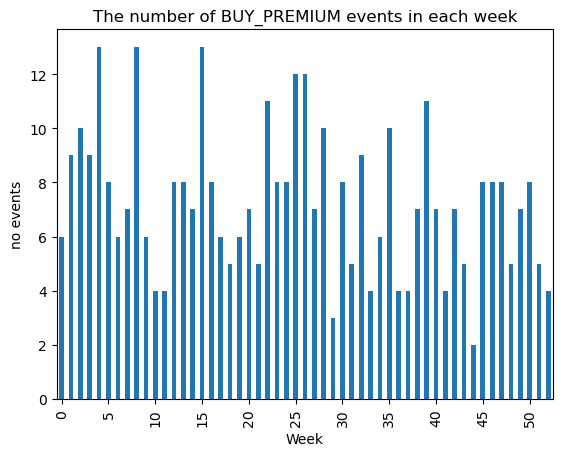

In [91]:
# group by week and count the number of records in each week
weekly_counts = session_df[session_df['event_type'] == 'BUY_PREMIUM'].groupby(pd.Grouper(freq='W'))['event_type'].count()
ax = weekly_counts.plot(kind="bar")
ax.set_title("The number of BUY_PREMIUM events in each week")
ax.set_xlabel("Week")
ax.set_ylabel("no events")

ax.set_xticks(range(0, len(weekly_counts), 5))
ax.set_xticklabels(range(0, len(weekly_counts), 5))

plt.show()

### How many time did they have to listen to an advertisement before favoutite ganre

In [179]:
# df that has sessions with user's favourite genre with artists
tracks_df = tracks_df.rename(columns={"id":"track_id"})
artists_df = artists_df.rename(columns={"id": "id_artist"})

all_session_df = session_df.merge(
        users_df[['user_id','favourite_genres']], on='user_id'
    ).merge(
        tracks_df[["popularity", "explicit", "track_id", "id_artist"]], on='track_id', how='left'
    ).merge(
        artists_df[["id_artist", "genres"]], on='id_artist', how='left'
    )
all_session_df.genres.fillna('[]', inplace=True)
all_session_df.favourite_genres.fillna('[]', inplace=True)
all_session_df['genres_combined'] = all_session_df.apply(
        lambda x: list(set(x['favourite_genres']).intersection(x['genres'])), axis=1
    )
all_session_df.head(20)

timestamp  user_id                track_id     event_type  \
0  2022-04-08 13:51:17.000      101  4iQeCUQXp6oxdYYkERY0LN           PLAY   
1  2022-04-08 13:55:45.440      101  2A3sgyp07d7ksgjyBHYSUt           PLAY   
2  2022-04-08 13:58:20.293      101  2A3sgyp07d7ksgjyBHYSUt           LIKE   
3  2022-04-08 13:58:36.413      101                          ADVERTISEMENT   
4  2022-04-08 13:58:41.413      101  1hqrYSqvNc9x3BETX1cZhk           PLAY   
5  2022-04-08 13:59:57.497      101  1hqrYSqvNc9x3BETX1cZhk           SKIP   
6  2022-04-08 13:59:57.497      101  2IQnlYDxjgBnMwj8MaNN9E           PLAY   
7  2022-04-08 14:02:40.804      101  077bzGp5Lub2Yofj0u76Le           PLAY   
8  2022-04-08 14:04:59.463      101  077bzGp5Lub2Yofj0u76Le           SKIP   
9  2022-04-08 14:04:59.463      101                          ADVERTISEMENT   
10 2022-04-08 14:05:29.463      101  7wC4EW11mBVxDK3xdC7FTf           PLAY   
11 2022-04-08 14:07:59.490      101  2Ud3deeqLAG988pfW0Kwcl           PLAY   
12 2022-04-08 14:10:23.678      101  2Ud3deeqLAG988pfW0Kwcl           SKIP   
13 2022-04-08 14:10:23.678      101  3p5YyzoacjynG9k67ONSXV           PLAY   
14 2022-04-08 14:11:36.060      101  3p5YyzoacjynG9k67ONSXV           LIKE   
15 2022-04-08 14:13:55.705      101  3p5YyzoacjynG9k67ONSXV           SKIP   
16 2022-04-08 14:13:55.705      101  27gWlWj3amlC6EaUWxkMcZ           PLAY   
17 2022-04-08 14:15:43.817      101  27gWlWj3amlC6EaUWxkMcZ           SKIP   
18 2022-04-08 14:15:43.817      101  2YplrdHMBoRdnHgMeHEwHm           PLAY   
19 2022-04-08 14:18:49.070      101  1nxgnG63hvc87iBLEvCuHS           PLAY   

    session_id                       favourite_genres  popularity  explicit  \
0          124  [folk, brill building pop, dance pop]        30.0       0.0   
1          124  [folk, brill building pop, dance pop]        36.0       0.0   
2          124  [folk, brill building pop, dance pop]        36.0       0.0   
3          124  [folk, brill building pop, dance pop]         NaN       NaN   
4          124  [folk, brill building pop, dance pop]        68.0       0.0   
5          124  [folk, brill building pop, dance pop]        68.0       0.0   
6          124  [folk, brill building pop, dance pop]        25.0       0.0   
7          124  [folk, brill building pop, dance pop]        23.0       0.0   
8          124  [folk, brill building pop, dance pop]        23.0       0.0   
9          124  [folk, brill building pop, dance pop]         NaN       NaN   
10         124  [folk, brill building pop, dance pop]        49.0       0.0   
11         124  [folk, brill building pop, dance pop]        61.0       0.0   
12         124  [folk, brill building pop, dance pop]        61.0       0.0   
13         124  [folk, brill building pop, dance pop]        22.0       0.0   
14         124  [folk, brill building pop, dance pop]        22.0       0.0   
15         124  [folk, brill building pop, dance pop]        22.0       0.0   
16         124  [folk, brill building pop, dance pop]        34.0       0.0   
17         124  [folk, brill building pop, dance pop]        34.0       0.0   
18         124  [folk, brill building pop, dance pop]        55.0       0.0   
19         124  [folk, brill building pop, dance pop]        39.0       0.0   

                 id_artist                                             genres  \
0   7bu3H8JO7d0UbMoVzbo70s                   [new wave, permanent wave, rock]   
1   22bE4uQ6baNwSHPVcDxLCe             [british invasion, classic rock, rock]   
2   22bE4uQ6baNwSHPVcDxLCe             [british invasion, classic rock, rock]   
3                      NaN                                                 []   
4   0cc6vw3VN8YlIcvr1v7tBL  [glam metal, hard rock, metal, rock, sleaze rock]   
5   0cc6vw3VN8YlIcvr1v7tBL  [glam metal, hard rock, metal, rock, sleaze rock]   
6   0vn7UBvSQECKJm2817Yf1P  [adult standards, classic rock, folk, folk roc...   
7   5fwaejlOHVBAw1KhIPPaQe  [black metal, black thrash, british black 

In [191]:
all_session_df['prev_event'] = all_session_df['event_type'].shift()
prev_adv = all_session_df.loc[all_session_df['prev_event']=='ADVERTISEMENT']
prev_adv = prev_adv.loc[prev_adv['event_type'].isin(['PLAY', 'SKIP'])]
prev_adv_fav = prev_adv[prev_adv.apply(lambda x: len(x['genres_combined']) > 0, axis=1)]

prev_adv_fav.count()

timestamp           9571
user_id             9571
track_id            9571
event_type          9571
session_id          9571
favourite_genres    9571
popularity          9571
explicit            9571
id_artist           9571
genres              9571
genres_combined     9571
prev_event          9571
dtype: int64